In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
x1 = np.array([-1, 1, 3, 4, 6])
y = np.array([-1, 1, -1, 1, 1])

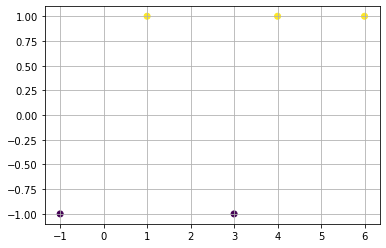

In [29]:
plt.scatter(x, y, c=y)
plt.grid(True)

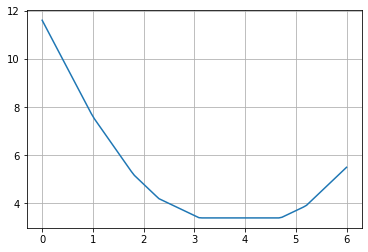

In [24]:
J = []

for tv in t:
    z = x - tv
    Jt = np.sum(np.maximum(0, 1-y*z))
    J.append(Jt)

J = np.array(J)
plt.plot(t, J)
plt.grid(True)

In [30]:
x = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0])
w = np.array([0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0])

xdotw = np.dot(x, w)
xdotw

2

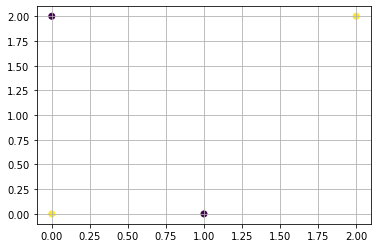

In [31]:
x1 = [0, 1, 0, 2]
x2 = [0, 0, 2, 2]
y = [1, -1, -1, 1]

plt.scatter(x1, x2, c=y)
plt.grid(True)

In [8]:
Xi = []
Xi.append(np.array([[1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0]]))
Xi.append(np.array([[0, 1, 0, 0], [0, 1, 0, 0], [0, 1, 0, 0], [0, 1, 0, 0]]))
Xi.append(np.array([[0, 0, 1, 0], [0, 0, 1, 0], [0, 0, 1, 0], [0, 0, 1, 0]]))

X = np.array([[1, 0, 0, 0], [1, 0, 0, 0], [0.5, 0.5, 0, 0], [0, 1, 0, 0]])

Xi, X

([array([[1, 0, 0, 0],
         [1, 0, 0, 0],
         [1, 0, 0, 0],
         [1, 0, 0, 0]]),
  array([[0, 1, 0, 0],
         [0, 1, 0, 0],
         [0, 1, 0, 0],
         [0, 1, 0, 0]]),
  array([[0, 0, 1, 0],
         [0, 0, 1, 0],
         [0, 0, 1, 0],
         [0, 0, 1, 0]])],
 array([[1. , 0. , 0. , 0. ],
        [1. , 0. , 0. , 0. ],
        [0.5, 0.5, 0. , 0. ],
        [0. , 1. , 0. , 0. ]]))

In [11]:
xi_f = []
for i in range(3):
    xi_f.append(Xi[i].flatten())

x_f = X.flatten()
xi_f, x_f

([array([1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0]),
  array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0]),
  array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0])],
 array([1. , 0. , 0. , 0. , 1. , 0. , 0. , 0. , 0.5, 0.5, 0. , 0. , 0. ,
        1. , 0. , 0. ]))

In [20]:
dist = []
for i in range(3):
    d = (x_f-xi_f[i])**2
    dist.append(np.sum(d, axis=0))
    print(dist[i])

2.5
4.5
7.5


In [28]:
alpha = [1, 1, 0]
b = -0.5
g = 0.2
# we have distances calculated already.

ytr = [1, 1, -1]

def predict(Xtr, ytr, X, alpha, b, g):
    # Compute Distances
    D = np.sum((X[:, None, :] - Xtr[None, :, :])**2, axis=2)
    
    # Compute Kernel
    K = np.where(np.max(0, (1-D*g)), 1, -1)
    
    # Compute Score
    z = K.dot(ytr*alpha) + b
    
    # Compute Predicted Labels.
    yhat = 2*(z > 0)-1
    return yhat

yhat = predict(xi_f, ytr, X, alpha, b, g)
print(yhat)

TypeError: list indices must be integers or slices, not tuple

In [29]:
def predict(Wh ,bh, x, y):
    # Hidden layer
    zh = np.sum(Wh*x, axis=1) + bh
    uh = np.maximum (0, zh)
    
    Wo, bo = lstsq(uh, y) # Solves the least squares problem uh.dot(beta) = y

    return Wo, bo

In [30]:
X = np.randm.normal(0, 1, (100, 200))
X.shape

(100, 200)

In [32]:
# FULL SVD:
U, s, Vtr = np.linalg.svd(X, full_matrices=False)
U.shape, s.shape, Vtr.shape

((100, 100), (100,), (100, 200))

In [41]:
from scipy.sparse.linalg import svds

u, s, v = svds(X, k=3)D

In [42]:
u.shape, s.shape, v.shape

((100, 3), (3,), (3, 200))

In [43]:
def classify(X, pretrained):
    # Pretrained is the classfier of 1000 image classes.
    results = pretrained.predict(X)  # Returns logits for 1000 classes.
    # Pick the class whose probability is highest, returns one of the 1000 classes.
    z = results.argmax()      
    # If returned class is 50, return 1(Bicycle found) or return 0
    yhat = np.where(z==50, 1, 0)     

In [44]:
def fit(Xtr, ytr, pretrained_base):
    Z = pretrained_base.predict(Xtr)
    reg = LogisticRegression()
    # Adding one layer from the pretrained model
    reg.fit(Z, ytr)
    
    return reg

def predict(X, reg, pretrained_base):
    Z = pretrained_base.predict(X)
    # Uses pretrained model first and then adds
    # a layer on the pretrained model into the reg
    # and uses reg object to predict.
    yhat = reg.predict(Z)
    return yhat


In [ ]:
def fit(Xtr, ytr, nc):
    # Fit K means on the training data
    km = KMeans(n_cluster=nc)
    km.fit(Xtr)
    return km

def predict(X, Xtr, ytr, nc):
    # Loop over clusters
    reg = []
    n = X.shape[0]
    yhat[]
    
    for i in range(nc):
        # Find indices in the cluster
        Itr = np.where(x == i)[0]
        
        # Fit the Linear reg object 
        reg = LinearRegression()
        reg.fit(Xtr[Itr, :], ytr[Itr])
        
        # Predict 
        yhati = reg.predict(X[Itr, :])
        
        yhat.append(yhati)
    return yhat